# Mesh Exporting using RhinoCompute + Grasshopper + MeshIO/NumpySTL

<center><img src="images/diagram04.jpg" width="500" height=><center>

# 01 Initial Setup

In [5]:
# For rhino compute
import compute_rhino3d.Util
import compute_rhino3d.Grasshopper as gh
import rhino3dm
import json

# For exporting STL
# mesh io
import meshio
# numpy STL
import numpy as np
from stl import mesh
# matplotlib for displaying
from mpl_toolkits import mplot3d
from matplotlib import pyplot

In [6]:
# we are using local server for this exmample
compute_rhino3d.Util.url = "http://localhost:8081/"
post_url = compute_rhino3d.Util.url + "grasshopper"

In [7]:
ghx_dir = 'ghx\\'

In [8]:
# name of the files to be used
ghfile = ghx_dir + 'ex04-15-mesh-export.ghx'

# 02 Testing Each Component

In [9]:
def mesh_vlist(mesh_tri: bool):
    mesh_tri_tr = gh.DataTree('RH_IN:mesh_tri')
    mesh_tri_tr.Append([0],[mesh_tri])

    trees=[mesh_tri_tr]

    # Send data to compute server
    output = gh.EvaluateDefinition(ghfile, trees)
    # print(output)
    values = output["values"]

    # getting tags
    def ns(name):
        for i in range(len(values)):
            tname = values[i]["ParamName"]
            if (tname == "RH_OUT:" + name):
                return i

    # convert data
    tag = "mesh_vertex_list"
    ou_ind = ns(tag)
    ou_dict = values[ou_ind]["InnerTree"]
    # because this object has nested tree, we have to run loop
    ou_value = list(ou_dict.values()) #[0] #[0]["data"]

    ou_serial = []

    # check for everything and throw back lists
    for i in range(len(ou_value)):
        for j in range(len(ou_value[i])):
            # swipe through all data tree (haven't checked for triple quadraple nested trees)
            ds = ou_value[i][j]["data"]
            ds_js = json.loads(ds)
            
            # check whether it is rhino geometry or just string / float
            try:
                ds_obj = rhino3dm.CommonObject.Decode(ds_js)
            except:
                ds_obj = ds_js

            # check if the string can be converted into list again
            if ( type(ds_obj) is str):
                try :
                    ds_obj = json.loads(ds_obj)
                except:
                    ds_obj = ds_obj
            else:
                pass
            #append final data
            ou_serial.append( ds_obj )

    return ou_serial

In [10]:
def mesh_ftype(mesh_tri: bool):
    mesh_tri_tr = gh.DataTree('RH_IN:mesh_tri')
    mesh_tri_tr.Append([0],[mesh_tri])

    trees=[mesh_tri_tr]

    # Send data to compute server
    output = gh.EvaluateDefinition(ghfile, trees)
    # print(output)
    values = output["values"]

    # getting tags
    def ns(name):
        for i in range(len(values)):
            vname = values[i]["ParamName"]
            if (vname == "RH_OUT:" + name):
                return i

    # convert data
    tag = "mesh_face_type"
    ou_ind = ns(tag)
    ou_dict = values[ou_ind]["InnerTree"]
    # because this object has nested tree, we have to run loop
    ou_value = list(ou_dict.values()) #[0] #[0]["data"]
    
    ou_serial = []

    # check for everything and throw back lists
    for i in range(len(ou_value)):
        for j in range(len(ou_value[i])):
            # swipe through all data tree (haven't checked for triple quadraple nested trees)
            ds = ou_value[i][j]["data"]
            ds_js = json.loads(ds)
            
            # check whether it is rhino geometry or just string / float
            try:
                ds_obj = rhino3dm.CommonObject.Decode(ds_js)
            except:
                ds_obj = ds_js

            # check if the string can be converted into list again
            if ( type(ds_obj) is str):
                try : 
                    ds_obj = json.loads(ds_obj)
                except:
                    ds_obj = ds_obj
            else:
                pass
            #append final data
            ou_serial.append( ds_obj )

    return ou_serial

In [11]:
def mesh_flist(mesh_tri: bool):
    mesh_tri_tr = gh.DataTree('RH_IN:mesh_tri')
    mesh_tri_tr.Append([0],[mesh_tri])

    trees=[mesh_tri_tr]

    # Send data to compute server
    output = gh.EvaluateDefinition(ghfile, trees)
    # print(output)
    values = output["values"]

    # getting tags
    def ns(name):
        for i in range(len(values)):
            vname = values[i]["ParamName"]
            if (vname == "RH_OUT:" + name):
                return i

    # convert data
    tag = "mesh_face_list"
    ou_ind = ns(tag)
    ou_dict = values[ou_ind]["InnerTree"]
    # because this object has nested tree, we have to run loop
    ou_value = list(ou_dict.values()) #[0] #[0]["data"]

    ou_serial = []

    # check for everything and throw back lists
    for i in range(len(ou_value)):
        for j in range(len(ou_value[i])):
            # swipe through all data tree (haven't checked for triple quadraple nested trees)
            ds = ou_value[i][j]["data"]
            ds_js = json.loads(ds)
            
            # check whether it is rhino geometry or just string / float
            try:
                ds_obj = rhino3dm.CommonObject.Decode(ds_js)
            except:
                ds_obj = ds_js

            # check if the string can be converted into list again
            if ( type(ds_obj) is str):
                try :
                    ds_obj = json.loads(ds_obj)
                except:
                    ds_obj = ds_obj
            else:
                pass

            ou_serial.append( ds_obj )

    return ou_serial

In [12]:
mesh_tri = True
m_vl = mesh_vlist(mesh_tri)
m_ft = mesh_ftype(mesh_tri)
m_fl = mesh_flist(mesh_tri)

# 03 Exporting Using MeshIO

In [13]:
m_points = m_vl
# Actually this should be written more carefully
# if we are mixing quad mesh and triangular mesh
m_pair = (m_ft[0], m_fl)
m_cells = []
m_cells.append( m_pair )

In [14]:
stl_filename = "STL\ex04-15-MSIO.stl"
print(stl_filename)

STL\ex04-15-MSIO.stl


In [15]:
# Alternative with the same options
check = meshio.write_points_cells(stl_filename, m_points, m_cells)
print(check)

None


C:\Python37\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


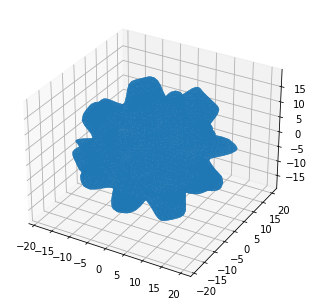

In [16]:
# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file(stl_filename)
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

# 04 Exporting Using Numpy STL

In [17]:
stl_filename = "STL\ex04-15-NPSTL.stl"
print(stl_filename)

STL\ex04-15-NPSTL.stl


In [18]:
# Define the 8 vertices of the cube
vertices = np.array(m_vl)
# Define the 12 triangles composing the cube
faces = np.array(m_fl)

# Create the mesh
ex_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        ex_mesh.vectors[i][j] = vertices[f[j],:]

# Write the mesh to file "cube.stl"
ex_mesh.save(stl_filename)

C:\Python37\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


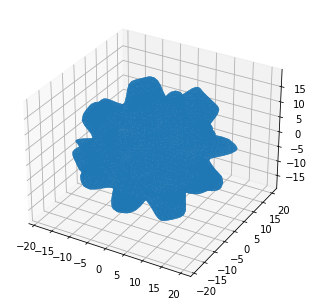

In [19]:
# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file(stl_filename)
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

# 05 MeshIO method Wrapped into one function

In [20]:
def mesh_export_io(mesh_param: float, mesh_tri: bool, file_name: str):
    # Initializing
    mesh_param_tr = gh.DataTree('RH_IN:mesh_param')
    mesh_param_tr.Append([0], [mesh_param])

    mesh_tri_tr = gh.DataTree('RH_IN:mesh_tri')
    mesh_tri_tr.Append([0],[mesh_tri])
    trees=[mesh_tri_tr]
    #########################################################################
    # Send data to compute server
    output = gh.EvaluateDefinition(ghfile, trees)
    # print(output)
    values = output["values"]
    #########################################################################
    # getting tags
    def ns(name):
        for i in range(len(values)):
            tname = values[i]["ParamName"]
            if (tname == "RH_OUT:" + name):
                return i
    #########################################################################
    # Getting mesh_vlist
    tag = "mesh_vertex_list"
    ou_ind = ns(tag)
    ou_dict = values[ou_ind]["InnerTree"]
    # This might have nested loop. So we would need to run loops
    ou_value = list(ou_dict.values())
    # Initializing List to store data
    mesh_vlist = []
    # check for everything and throw back lists
    for i in range(len(ou_value)):
        for j in range(len(ou_value[i])):
            # swipe through all data tree (haven't checked for triple quadraple nested trees)
            ds = ou_value[i][j]["data"]
            ds_js = json.loads(ds)
            # check if the string can be converted into list again
            if ( type(ds_js) is str):
                try :
                    ds_js = json.loads(ds_js)
                except:
                    pass
            else:
                pass
            #append final data
            mesh_vlist.append( ds_js )
    #########################################################################

    #########################################################################
    # Getting mesh_ftype
    tag = "mesh_face_type"
    ou_ind = ns(tag)
    ou_dict = values[ou_ind]["InnerTree"]
    # This might have nested loop. So we would need to run loops
    ou_value = list(ou_dict.values())
    # Initializing List to store data
    mesh_ftype = []
    # check for everything and throw back lists
    for i in range(len(ou_value)):
        for j in range(len(ou_value[i])):
            # swipe through all data tree (haven't checked for triple quadraple nested trees)
            ds = ou_value[i][j]["data"]
            ds_js = json.loads(ds)
            # check if the string can be converted into list again
            if ( type(ds_js) is str):
                try : 
                    ds_js = json.loads(ds_js)
                except:
                    pass
            else:
                pass
            # append final data
            mesh_ftype.append( ds_js )
    #########################################################################

    #########################################################################
    # Getting mesh_flist
    tag = "mesh_face_list"
    ou_ind = ns(tag)
    ou_dict = values[ou_ind]["InnerTree"]
    # This might have nested loop. So we would need to run loops
    ou_value = list(ou_dict.values())
    # Initializing List to store data
    mesh_flist = []
    # check for everything and throw back lists
    for i in range(len(ou_value)):
        for j in range(len(ou_value[i])):
            # swipe through all data tree (haven't checked for triple quadraple nested trees)
            ds = ou_value[i][j]["data"]
            ds_js = json.loads(ds)
            # check if the string can be converted into list again
            if ( type(ds_js) is str):
                try :
                    ds_js = json.loads(ds_js)
                except:
                    pass
            else:
                pass
            # append final data
            mesh_flist.append( ds_js )
    #########################################################################
    # Writing mesh using Mesh IO
    meshio.write_points_cells(directory, m_points, m_cells)
    #########################################################################
    # Encapsulate data incase you need
    mesh_capsule = dict()
    mesh_capsule['mesh_vlist'] = mesh_vlist
    mesh_capsule['mesh_ftype'] = mesh_ftype
    mesh_capsule['mesh_flist'] = mesh_flist
    #########################################################################
    return mesh_capsule

In [21]:
mesh_param = float(20.0)
mesh_tri = True
directory = "STL\ex04-15-"+str(mesh_param)+".stl"
print(directory)
# directory = 'ex04-15-0004.stl'
m_cap = mesh_export_io(mesh_param, mesh_tri, directory)

STL\ex04-15-20.0.stl


C:\Python37\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


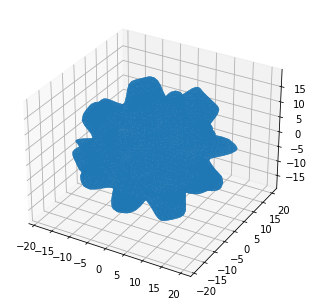

In [22]:
# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file(directory)
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

In [23]:
m1 = m_cap['mesh_vlist']
m2 = m_cap['mesh_ftype']
m3 = m_cap['mesh_flist']

# 06 Numpy STL method Wraped into one function

In [24]:
def mesh_export_np(mesh_param: float, file_name: str):
    # Initializing
    mesh_param_tr = gh.DataTree('RH_IN:mesh_param')
    mesh_param_tr.Append([0], [mesh_param])

    mesh_tri_tr = gh.DataTree('RH_IN:mesh_tri')
    mesh_tri = True
    mesh_tri_tr.Append([0],[mesh_tri])
    #########################################################################
    # Merge all Data Tree # Double check if anything is missing
    trees=[mesh_param_tr, mesh_tri_tr]
    #########################################################################
    # Send data to compute server
    output = gh.EvaluateDefinition(ghfile, trees)
    values = output["values"]
    #########################################################################
    # getting tags
    def ns(name):
        for i in range(len(values)):
            tname = values[i]["ParamName"]
            if (tname == "RH_OUT:" + name):
                return i
    #########################################################################
    # Getting mesh_vlist
    tag = "mesh_vertex_list"
    ou_ind = ns(tag)
    ou_dict = values[ou_ind]["InnerTree"]
    # because this object has nested tree, we have to run loop
    ou_value = list(ou_dict.values())
    # initialized list
    mesh_vlist = []
    # check for everything and throw back lists
    for i in range(len(ou_value)):
        for j in range(len(ou_value[i])):
            # swipe through all data tree (haven't checked for triple quadraple nested trees)
            ds = ou_value[i][j]["data"]
            ds_js = json.loads(ds)
            # check if the string can be converted into list again
            if ( type(ds_js) is str):
                try :
                    ds_js = json.loads(ds_js)
                except:
                    pass
            else:
                pass
            #append final data
            mesh_vlist.append( ds_js )
    #########################################################################

    #########################################################################
    # Getting mesh_ftype
    tag = "mesh_face_type"
    ou_ind = ns(tag)
    ou_dict = values[ou_ind]["InnerTree"]
    # because this object has nested tree, we have to run loop
    ou_value = list(ou_dict.values())
    # initialized list
    mesh_ftype = []
    # check for everything and throw back lists
    for i in range(len(ou_value)):
        for j in range(len(ou_value[i])):
            # swipe through all data tree (haven't checked for triple quadraple nested trees)
            ds = ou_value[i][j]["data"]
            ds_js = json.loads(ds)
            # check if the string can be converted into list again
            if ( type(ds_js) is str):
                try : 
                    ds_js = json.loads(ds_js)
                except:
                    pass
            else:
                pass
            # append final data
            mesh_ftype.append( ds_js )
    #########################################################################

    #########################################################################
    # Getting mesh_flist
    tag = "mesh_face_list"
    ou_ind = ns(tag)
    ou_dict = values[ou_ind]["InnerTree"]
    # because this object has nested tree, we have to run loop
    ou_value = list(ou_dict.values())
    # initialized list
    mesh_flist = []
    # check for everything and throw back lists
    for i in range(len(ou_value)):
        for j in range(len(ou_value[i])):
            # swipe through all data tree (haven't checked for triple quadraple nested trees)
            ds = ou_value[i][j]["data"]
            ds_js = json.loads(ds)
            # check if the string can be converted into list again
            if ( type(ds_js) is str):
                try :
                    ds_js = json.loads(ds_js)
                except:
                    pass
            else:
                pass
            # append final data
            mesh_flist.append( ds_js )
    #########################################################################

    #########################################################################
    #Writing STL using numpy STL
    vertices = np.array(mesh_vlist)
    faces = np.array(mesh_flist)
    # Create the mesh
    ex_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
    for i, f in enumerate(faces):
        for j in range(3):
            ex_mesh.vectors[i][j] = vertices[f[j],:]
    # Write the mesh to file "cube.stl"
    ex_mesh.save(directory)
    #########################################################################
    # Encapulate data incase you need
    mesh_capsule = dict()
    mesh_capsule['mesh_vlist'] = mesh_vlist
    mesh_capsule['mesh_ftype'] = mesh_ftype
    mesh_capsule['mesh_flist'] = mesh_flist
    #########################################################################
    return mesh_capsule

In [25]:
mesh_param = float(10.0)
i = int(mesh_param)
i = format(i, '04d')
directory = "STL\ex04-15-np-"+i+".stl"
print(directory)

m_cap = mesh_export_np(mesh_param, directory)

STL\ex04-15-np-0010.stl


C:\Python37\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


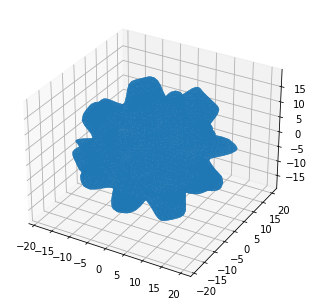

In [26]:
# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file(directory)
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

# 07 Calling Function Multiple Times

In [ ]:
<center><img src="images/diagram04.jpg" width="500" height=><center>

In [27]:
for i in range (50):
    mesh_param = 10+i
    fr = int(mesh_param)
    fr = format(fr, '03d')
    fr = str(fr)
    directory = "STL\RUN\ex04-15-np-"+fr+".stl"
    print(directory)

    mesh_export_np(mesh_param, directory)

STL\ex04-15-np-010.stl
STL\ex04-15-np-011.stl
STL\ex04-15-np-012.stl
STL\ex04-15-np-013.stl
STL\ex04-15-np-014.stl
STL\ex04-15-np-015.stl
STL\ex04-15-np-016.stl
STL\ex04-15-np-017.stl
STL\ex04-15-np-018.stl
STL\ex04-15-np-019.stl
STL\ex04-15-np-020.stl
STL\ex04-15-np-021.stl
STL\ex04-15-np-022.stl
STL\ex04-15-np-023.stl
STL\ex04-15-np-024.stl
STL\ex04-15-np-025.stl
STL\ex04-15-np-026.stl
STL\ex04-15-np-027.stl
STL\ex04-15-np-028.stl
STL\ex04-15-np-029.stl
STL\ex04-15-np-030.stl
STL\ex04-15-np-031.stl
STL\ex04-15-np-032.stl
STL\ex04-15-np-033.stl
STL\ex04-15-np-034.stl
STL\ex04-15-np-035.stl
STL\ex04-15-np-036.stl
STL\ex04-15-np-037.stl
STL\ex04-15-np-038.stl
STL\ex04-15-np-039.stl
STL\ex04-15-np-040.stl
STL\ex04-15-np-041.stl
STL\ex04-15-np-042.stl
STL\ex04-15-np-043.stl
STL\ex04-15-np-044.stl
STL\ex04-15-np-045.stl
STL\ex04-15-np-046.stl
STL\ex04-15-np-047.stl
STL\ex04-15-np-048.stl
STL\ex04-15-np-049.stl
STL\ex04-15-np-050.stl
STL\ex04-15-np-051.stl
STL\ex04-15-np-052.stl
STL\ex04-15